In [163]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import make_blobs

# Generate synthetic data
np. random . seed (0)
centers = [[ -5 , 0], [0, 1.5]]
X, y = make_blobs ( n_samples =1000 , centers = centers ,random_state =40)
transformation = [[0.4 , 0.2] , [ -0.4 , 1.2]]
X = np.dot(X, transformation )

# Add a bias term to the feature matrix
X = np.c_[np. ones ((X. shape [0] , 1)), X]

# Initialize coefficients
W = np. zeros (X. shape [1])

# Define the logistic sigmoid function
def sigmoid (z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss ( binary cross - entropy)function
def log_loss (y_true , y_pred ):
    epsilon = 1e-15
    y_pred = np. clip (y_pred , epsilon , 1 - epsilon ) # Clipto avoid log (0)
    return - ( y_true * np. log ( y_pred ) + (1 - y_true ) * np.log (1 - y_pred ))

# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history_BGD= []
loss_history_Newton = []

one_matrix = np.ones((X.shape[0], 1))
W=W.reshape(3,1)
y=y.reshape(len(y),1)


In [164]:
#performing Batch Gradient Descent

for i in range ( iterations ):
    y_pred = sigmoid ( np. dot (X , W))
    loss = log_loss ( y , y_pred )
    loss_history_BGD . append ( np. sum ( np.mean(loss) ))
    residual = y_pred - y
    residual = residual.reshape(len(residual))
    diagonal_residual = np. diag ( residual )
    gradient = one_matrix. T @ diagonal_residual@ X 
    gradient = gradient.T / y . size
    W -= learning_rate * gradient
    print ( f'Iteration {i} : Loss {loss_history_BGD [i]}')

Iteration 0 : Loss 0.6931471805599454
Iteration 1 : Loss 0.6328211522065751
Iteration 2 : Loss 0.5823972949578101
Iteration 3 : Loss 0.5400400231011129
Iteration 4 : Loss 0.5042051102371915
Iteration 5 : Loss 0.4736389534183553
Iteration 6 : Loss 0.44734329598374695
Iteration 7 : Loss 0.4245298511469433
Iteration 8 : Loss 0.4045770169455826
Iteration 9 : Loss 0.38699321002389653


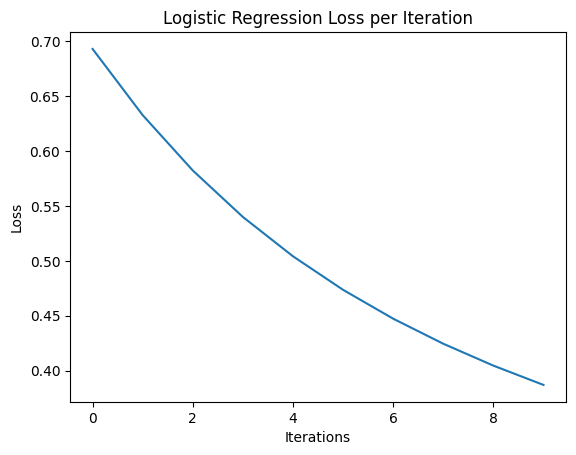

In [165]:
# Plot the loss function over iterations
plt. figure ()
plt. plot ( np. arange ( iterations ), loss_history_BGD )
plt. title ('Logistic Regression Loss per Iteration')
plt. xlabel ('Iterations')
plt. ylabel ('Loss')
plt. show ()

In [166]:
# perform Newton's method
W = np. zeros (X. shape [1])
W=W.reshape(3,1)

for i in range ( iterations ):
    y_pred = sigmoid ( np. dot (X , W))

    s = ( (y_pred - y) * (1 - y_pred - y))
    s = s.reshape(len(s))
    S = np.diag(s)

    mulfact_a = X.T @ S @ X
    mulfact_a = mulfact_a / y . size
    mulfact_a = np.linalg.inv(mulfact_a)

    loss = log_loss ( y , y_pred )
    loss_history_Newton . append ( np. sum ( np.mean(loss) ))

    residual = y_pred - y
    residual = residual.reshape(len(residual))
    diagonal_residual = np. diag ( residual )

    mulfact_b= one_matrix. T @ diagonal_residual@ X 
    mulfact_b = mulfact_b.T / y . size

    W -= mulfact_a @ mulfact_b
    

    print ( f'Iteration {i} : Loss {loss_history_Newton [i]}')

Iteration 0 : Loss 0.6931471805599454
Iteration 1 : Loss 0.19326424132410205
Iteration 2 : Loss 0.09113723316903423
Iteration 3 : Loss 0.04938058810733571
Iteration 4 : Loss 0.030716074598479824
Iteration 5 : Loss 0.022022549931970507
Iteration 6 : Loss 0.01807356045399721
Iteration 7 : Loss 0.016618032722628157
Iteration 8 : Loss 0.0163234577557707
Iteration 9 : Loss 0.01630719622923481


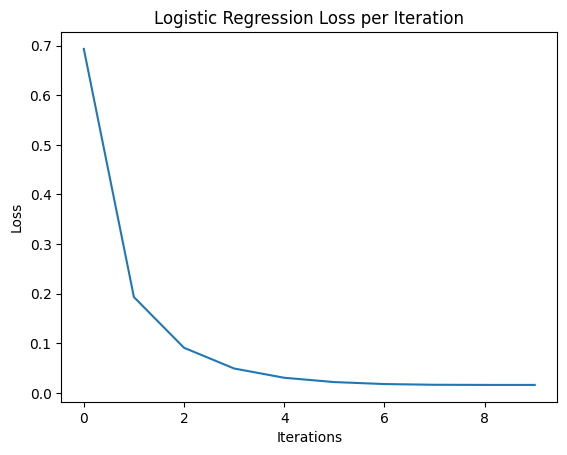

In [167]:
# Plot the loss function over iterations
plt. figure ()
plt. plot ( np. arange ( iterations ), loss_history_Newton )
plt. title ('Logistic Regression Loss per Iteration')
plt. xlabel ('Iterations')
plt. ylabel ('Loss')
plt. show ()

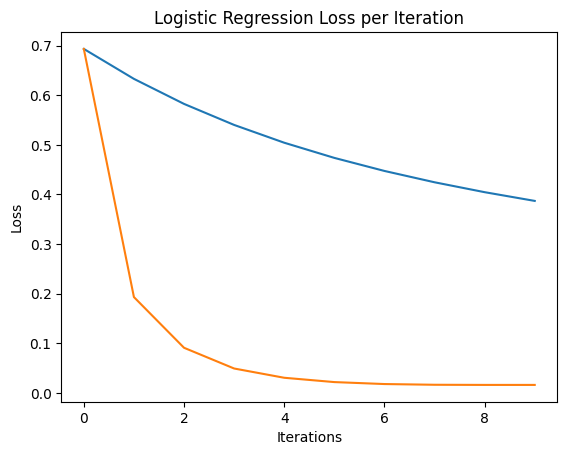

In [168]:
# plot both the loss functions
plt. figure ()
plt. plot ( np. arange ( iterations ), loss_history_BGD )
plt. plot ( np. arange ( iterations ), loss_history_Newton )
plt. title ('Logistic Regression Loss per Iteration')
plt. xlabel ('Iterations')
plt. ylabel ('Loss')
plt. show ()
